# 붓꽃 분류 문제(선형 분리가 가능한 데이터)

##1. Data Load

| 변수명        | 설명                                           |
| ------------- | ---------------------------------------------- |
| SepalLengthCm | 꽃받침의 길이                                  |
| SepalWidthCm  | 꽃받침의 너비                                  |
| PetalLengthCm | 꽃잎의 길이                                    |
| PetalWidthCm  | 꽃잎의 너비                                    |
| Species       | 붗꽃의 종류 ( setosa / versicolor / virginica) |



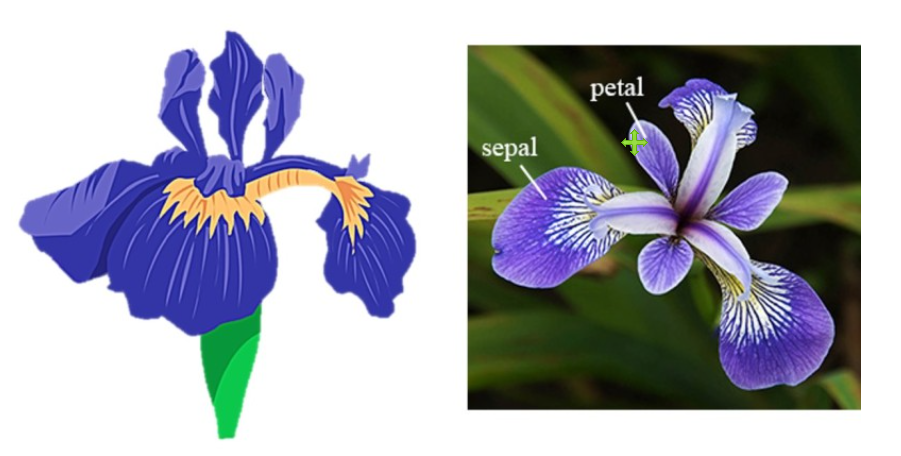

In [ ]:
import pandas as pd
import numpy as np

df = pd.read_csv('https://raw.githubusercontent.com/hrbae/DRB_ML_Training/main/2022/week7/data/iris.csv')

df

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [ ]:
df.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


##2. 탐색적 데이터 분석(EDA)

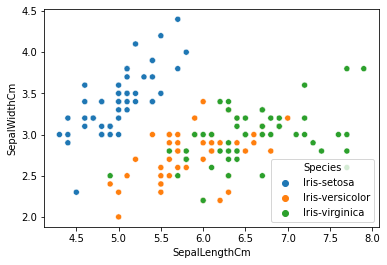

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.scatterplot(data=df, x='SepalLengthCm', y='SepalWidthCm', hue = 'Species')

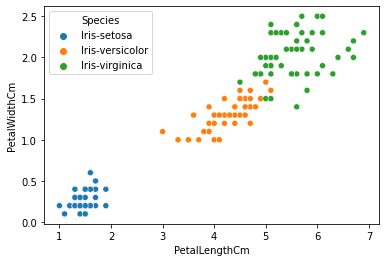

In [ ]:
sns.scatterplot(data = df, x = 'PetalLengthCm', y = 'PetalWidthCm', hue = 'Species')

In [ ]:
df = df[df['Species']!= 'Iris-virginica']

df

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
95,5.7,3.0,4.2,1.2,Iris-versicolor
96,5.7,2.9,4.2,1.3,Iris-versicolor
97,6.2,2.9,4.3,1.3,Iris-versicolor
98,5.1,2.5,3.0,1.1,Iris-versicolor


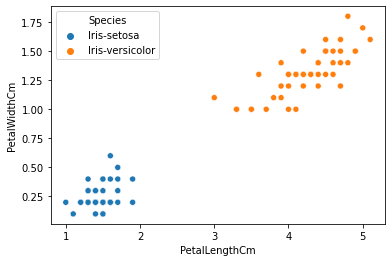

In [ ]:
sns.scatterplot(data = df, x = 'PetalLengthCm', y = 'PetalWidthCm', hue = 'Species')

In [ ]:
df = df[['PetalLengthCm', 'PetalWidthCm', 'Species']]

df

,PetalLengthCm,PetalWidthCm,Species
0,1.4,0.2,Iris-setosa
1,1.4,0.2,Iris-setosa
2,1.3,0.2,Iris-setosa
3,1.5,0.2,Iris-setosa
4,1.4,0.2,Iris-setosa
...,...,...,...
95,4.2,1.2,Iris-versicolor
96,4.2,1.3,Iris-versicolor
97,4.3,1.3,Iris-versicolor
98,3.0,1.1,Iris-versicolor


##3. 데이터 전처리
###3-1. 스케일링

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

df_scaled = df.copy()

df_scaled

,PetalLengthCm,PetalWidthCm,Species
0,1.4,0.2,Iris-setosa
1,1.4,0.2,Iris-setosa
2,1.3,0.2,Iris-setosa
3,1.5,0.2,Iris-setosa
4,1.4,0.2,Iris-setosa
...,...,...,...
95,4.2,1.2,Iris-versicolor
96,4.2,1.3,Iris-versicolor
97,4.3,1.3,Iris-versicolor
98,3.0,1.1,Iris-versicolor


In [ ]:
df_scaled.loc[:, ['PetalLengthCm', 'PetalWidthCm']] = scaler.fit_transform(df.loc[:, ['PetalLengthCm', 'PetalWidthCm']])

df_scaled


,PetalLengthCm,PetalWidthCm,Species
0,-1.014360,-1.038248,Iris-setosa
1,-1.014360,-1.038248,Iris-setosa
2,-1.083741,-1.038248,Iris-setosa
3,-0.944978,-1.038248,Iris-setosa
4,-1.014360,-1.038248,Iris-setosa
...,...,...,...
95,0.928326,0.736535,Iris-versicolor
96,0.928326,0.914013,Iris-versicolor
97,0.997708,0.914013,Iris-versicolor
98,0.095747,0.559057,Iris-versicolor


##4. SVM 학습
###4-1. 데이터 분리

In [ ]:
from sklearn.svm import LinearSVC

X = df_scaled[['PetalLengthCm', 'PetalWidthCm']]
y = df_scaled['Species']

X, y

(    PetalLengthCm  PetalWidthCm
 0       -1.014360     -1.038248
 1       -1.014360     -1.038248
 2       -1.083741     -1.038248
 3       -0.944978     -1.038248
 4       -1.014360     -1.038248
 ..            ...           ...
 95       0.928326      0.736535
 96       0.928326      0.914013
 97       0.997708      0.914013
 98       0.095747      0.559057
 99       0.858945      0.914013
 
 [100 rows x 2 columns], 0         Iris-setosa
 1         Iris-setosa
 2         Iris-setosa
 3         Iris-setosa
 4         Iris-setosa
            ...       
 95    Iris-versicolor
 96    Iris-versicolor
 97    Iris-versicolor
 98    Iris-versicolor
 99    Iris-versicolor
 Name: Species, Length: 100, dtype: object)

In [ ]:
y = y.map({'Iris-setosa': 0, 'Iris-versicolor': 1})

y

0     0
1     0
2     0
3     0
4     0
     ..
95    1
96    1
97    1
98    1
99    1
Name: Species, Length: 100, dtype: int64

###4-2. Hard margin SVM



In [ ]:
C = 1000
svc = LinearSVC(C=C)
svc.fit(X, y)

LinearSVC(C=1000)

In [ ]:
#파라미터 (W,b) 도출
w0,w1 = svc.coef_[0]
b=svc.intercept_[0]

In [ ]:
w0, w1

(1.0548050766818866, 1.0978397536298912)

In [ ]:
x0 = np.linspace(-1.7,0.7,num=100)

x0


array([-1.7       , -1.67575758, -1.65151515, -1.62727273, -1.6030303 ,
       -1.57878788, -1.55454545, -1.53030303, -1.50606061, -1.48181818,
       -1.45757576, -1.43333333, -1.40909091, -1.38484848, -1.36060606,
       -1.33636364, -1.31212121, -1.28787879, -1.26363636, -1.23939394,
       -1.21515152, -1.19090909, -1.16666667, -1.14242424, -1.11818182,
       -1.09393939, -1.06969697, -1.04545455, -1.02121212, -0.9969697 ,
       -0.97272727, -0.94848485, -0.92424242, -0.9       , -0.87575758,
       -0.85151515, -0.82727273, -0.8030303 , -0.77878788, -0.75454545,
       -0.73030303, -0.70606061, -0.68181818, -0.65757576, -0.63333333,
       -0.60909091, -0.58484848, -0.56060606, -0.53636364, -0.51212121,
       -0.48787879, -0.46363636, -0.43939394, -0.41515152, -0.39090909,
       -0.36666667, -0.34242424, -0.31818182, -0.29393939, -0.26969697,
       -0.24545455, -0.22121212, -0.1969697 , -0.17272727, -0.14848485,
       -0.12424242, -0.1       , -0.07575758, -0.05151515, -0.02

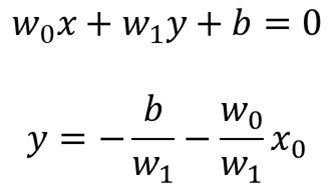

In [ ]:
#결정경계 도출
x1_decision = -b/w1 - w0/w1*x0 

#+ margin
x1_plus = x1_decision +(1/w1)

#- margin
x1_minus = x1_decision + (-1/w1)

In [ ]:
x1_decision

array([ 1.37415073e+00,  1.35085859e+00,  1.32756645e+00,  1.30427432e+00,
        1.28098218e+00,  1.25769005e+00,  1.23439791e+00,  1.21110578e+00,
        1.18781364e+00,  1.16452151e+00,  1.14122937e+00,  1.11793724e+00,
        1.09464510e+00,  1.07135297e+00,  1.04806083e+00,  1.02476869e+00,
        1.00147656e+00,  9.78184424e-01,  9.54892289e-01,  9.31600153e-01,
        9.08308018e-01,  8.85015883e-01,  8.61723747e-01,  8.38431612e-01,
        8.15139477e-01,  7.91847341e-01,  7.68555206e-01,  7.45263070e-01,
        7.21970935e-01,  6.98678800e-01,  6.75386664e-01,  6.52094529e-01,
        6.28802394e-01,  6.05510258e-01,  5.82218123e-01,  5.58925987e-01,
        5.35633852e-01,  5.12341717e-01,  4.89049581e-01,  4.65757446e-01,
        4.42465311e-01,  4.19173175e-01,  3.95881040e-01,  3.72588904e-01,
        3.49296769e-01,  3.26004634e-01,  3.02712498e-01,  2.79420363e-01,
        2.56128228e-01,  2.32836092e-01,  2.09543957e-01,  1.86251821e-01,
        1.62959686e-01,  

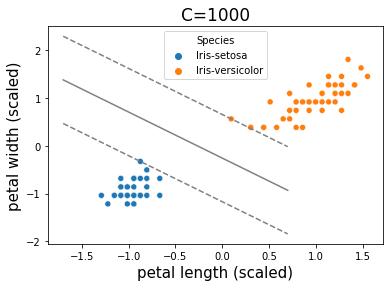

In [ ]:
sns.scatterplot(data=df_scaled, x='PetalLengthCm',y='PetalWidthCm', hue = 'Species')
plt.plot(x0,x1_decision,color = 'gray') # 결정 경계
plt.plot(x0,x1_plus,x0,x1_minus,color = 'gray',linestyle='--') # plus-margin , minus-margin
plt.xlabel('petal length (scaled)',fontsize=15) #x축 이름 설정
plt.ylabel('petal width (scaled)',fontsize=15) #y축 이름 설정 
plt.title(f'C={C}',fontsize=17) #제목 설정
plt.show()




###4-3. Soft margin SVM

In [ ]:
C = 1
svc = LinearSVC(C=C, loss = 'hinge')
svc.fit(X, y)

LinearSVC(C=1, loss='hinge')

In [ ]:
#파라미터 (W,b) 도출
w0,w1 = svc.coef_[0]
b=svc.intercept_[0]

In [ ]:
x0 = np.linspace(-1.7,0.7,num=100)

In [ ]:
#결정경계 도출
x1_decision = -b/w1 - w0/w1*x0

#+1 margin
x1_plus = x1_decision+1/w1

#-1 margin
x1_minus = x1_decision -1/w1

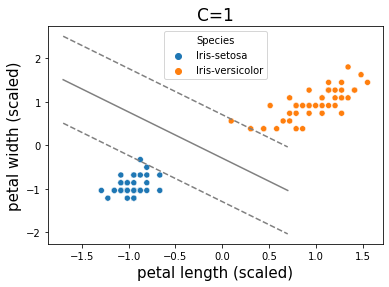

In [ ]:
sns.scatterplot(data=df_scaled, x='PetalLengthCm',y='PetalWidthCm',hue = 'Species')
plt.plot(x0,x1_decision,color = 'gray')
plt.plot(x0,x1_plus,x0,x1_minus,color = 'gray',linestyle='--')
plt.xlabel('petal length (scaled)',fontsize=15)
plt.ylabel('petal width (scaled)',fontsize=15)
plt.title(f'C={C}',fontsize=17)
plt.show()


# 선형 분리가 불가능한 데이터

##1. Data Load

* make_moons 
  * 초승달 모양 클러스터 두 개 형상의 임의 데이터를 생성 
  * make_moons 명령으로 만든 데이터는 직선을 사용하여 분류할 수 없음

In [ ]:
from sklearn.datasets import make_moons

In [ ]:
import pandas as pd

#make_moons(n_smaples=100, noise = 0)
#n_samples : 생성할 표본 개수
#noise: 노이즈의 크기, 0이면 완벽한 반원
X,y=make_moons(noise = 0.0, random_state=2022)
X, y

(array([[ 1.28452759e+00, -4.58667853e-01],
        [ 1.09602303e+00, -4.95379113e-01],
        [ 1.51839257e+00, -3.55142763e-01],
        [ 9.49055747e-01,  3.15108218e-01],
        [-6.23489802e-01,  7.81831482e-01],
        [ 9.90311321e-02,  6.61162609e-02],
        [ 1.59599895e-01,  9.87181783e-01],
        [ 1.98155916e+00,  3.08841371e-01],
        [ 5.37461710e-01, -3.86599306e-01],
        [ 1.28681296e-01,  9.28244800e-03],
        [ 1.92691676e+00,  1.24732995e-01],
        [ 9.81559157e-01,  1.91158629e-01],
        [ 6.54634946e-01, -4.38468422e-01],
        [ 1.98586378e-01, -9.81105305e-02],
        [-8.01413622e-01,  5.98110530e-01],
        [ 4.62538290e-01,  8.86599306e-01],
        [ 3.27051370e-02,  2.46345416e-01],
        [-9.49055747e-01,  3.15108218e-01],
        [ 2.38554042e-01, -1.48228395e-01],
        [ 1.94905575e+00,  1.84891782e-01],
        [-4.62538290e-01,  8.86599306e-01],
        [ 1.57211666e+00, -3.20172255e-01],
        [ 7.15472413e-01, -4.586

In [ ]:
data = pd.DataFrame(data=X, columns=['x1','x2'])
data['y']=y

data

,x1,x2,y
0,1.284528,-4.586679e-01,1
1,1.096023,-4.953791e-01,1
2,1.518393,-3.551428e-01,1
3,0.949056,3.151082e-01,0
4,-0.623490,7.818315e-01,0
...,...,...,...
95,1.761446,-1.482284e-01,1
96,0.050944,1.848918e-01,1
97,-1.000000,1.224647e-16,0
98,-0.967295,2.536546e-01,0


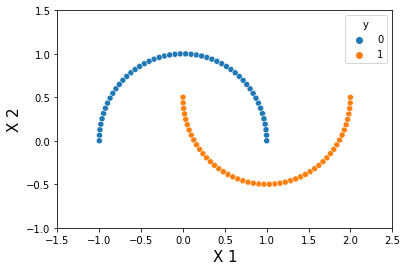

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.scatterplot(data=data, x='x1',y='x2',hue='y')
plt.xlim(-1.5,2.5)
plt.ylim(-1,1.5)
plt.xlabel('X 1',fontsize=15)
plt.ylabel('X 2', fontsize = 15)
plt.show()

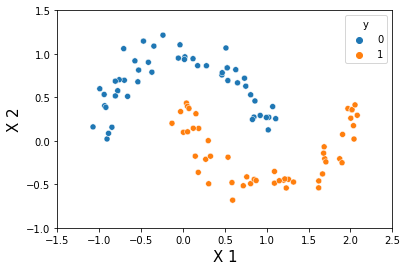

In [ ]:
#make_moons(n_smaples=100, noise = 0)
#n_samples : 생성할 표본 개수
#noise: 노이즈의 크기, 0이면 완벽한 반원
X,y=make_moons(noise = 0.1, random_state=2022)
X, y

data = pd.DataFrame(data=X, columns=['x1','x2'])
data['y']=y

sns.scatterplot(data=data, x='x1',y='x2',hue='y')
plt.xlim(-1.5,2.5)
plt.ylim(-1,1.5)
plt.xlabel('X 1',fontsize=15)
plt.ylabel('X 2', fontsize = 15)
plt.show()

##2. SVM 적용

###2-1. Hard margin SVM

In [ ]:
from sklearn.svm import LinearSVC

C = 100
svc = LinearSVC(C=C,loss='hinge')
svc.fit(data[['x1', 'x2']],data['y'])

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


LinearSVC(C=100, loss='hinge')

In [ ]:
#파라미터 (W,b) 도출
w0,w1 = svc.coef_[0]
b=svc.intercept_[0]

w0, w1, b

(0.8763708129602032, -2.8511881145930027, 0.37689193531227255)

In [ ]:
x0 = np.linspace(-1.7,2.7,num=100)

In [ ]:
#결정경계 도출
x1_decision = -b/w1 - w0/w1*x0

#+1 margin
x1_plus = x1_decision+1/w1

#-1 margin
x1_minus = x1_decision -1/w1

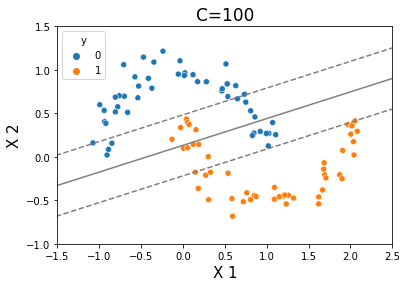

In [ ]:
sns.scatterplot(data=data, x='x1',y='x2',hue = 'y')
plt.xlim(-1.5,2.5)
plt.ylim(-1,1.5)
plt.plot(x0,x1_decision,color = 'gray')
plt.plot(x0,x1_plus,x0,x1_minus,color = 'gray',linestyle='--')
plt.xlabel('X 1',fontsize=15)
plt.ylabel('X 2',fontsize=15)
plt.title(f'C={C}',fontsize=17)
plt.show()

###2-2. Soft margin SVM

In [ ]:
C = 1
svc = LinearSVC(C=C,loss='hinge')
svc.fit(data[['x1', 'x2']].values,data['y'].values)

LinearSVC(C=1, loss='hinge')

In [ ]:
#파라미터 (W,b) 도출
w0,w1 = svc.coef_[0]
b=svc.intercept_[0]

x0 = np.linspace(-1.7,2.7,num=100)


In [ ]:
#결정경계 도출
x1_decision = -b/w1 - w0/w1*x0

#+1 margin
x1_plus = x1_decision+1/w1

#-1 margin
x1_minus = x1_decision -1/w1

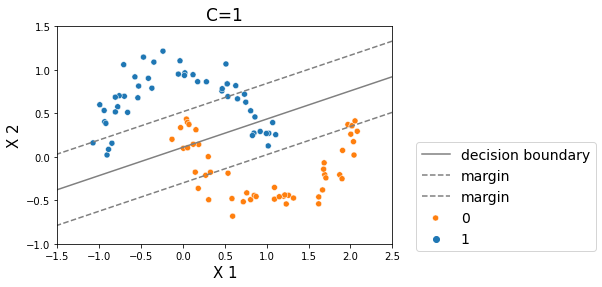

In [ ]:
sns.scatterplot(data=data, x='x1',y='x2',hue = 'y')
plt.xlim(-1.5,2.5)
plt.ylim(-1,1.5)
plt.plot(x0,x1_decision,color = 'gray')
plt.plot(x0,x1_plus,x0,x1_minus,color = 'gray',linestyle='--')
plt.legend(['decision boundary','margin','margin','0','1'], fontsize=14, bbox_to_anchor=(1.05,0.5))
plt.xlabel('X 1',fontsize=15)
plt.ylabel('X 2',fontsize=15)
plt.title(f'C={C}',fontsize=17)
plt.show()

###2-3. 커널 펑션을 활용한 SVM

In [ ]:
from sklearn.svm import SVC #커널펑션 적용할 때는 LinearSVC가 아닌 SVC 사용
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_scaled = scaler.fit_transform(X)

X_scaled, y

(array([[ 0.84850418, -1.39458809],
        [ 0.65998465, -1.48307238],
        [ 1.25454666, -1.43256028],
        [ 0.3847176 ,  0.02962363],
        [-1.16364119,  1.10584358],
        [-0.56242242, -0.31852773],
        [-0.54235344,  1.40911072],
        [ 1.64588866,  0.22475124],
        [ 0.09851125, -1.8728562 ],
        [-0.50640874, -0.30758096],
        [ 1.72075865, -0.16722213],
        [ 0.67682413, -0.0070375 ],
        [ 0.24165176, -1.54274682],
        [-0.4029634 , -0.86526224],
        [-1.62627022,  0.54708241],
        [ 0.02233208,  1.15673974],
        [-0.71542851, -0.1127973 ],
        [-1.61955366,  0.28920396],
        [-0.26288433, -0.9360491 ],
        [ 1.68490154,  0.00421039],
        [-1.21322429,  1.3165352 ],
        [ 1.30543582, -1.27225196],
        [ 0.33988354, -1.49473789],
        [-0.25335221,  1.20432635],
        [-0.60003511,  0.15466829],
        [ 0.78432917, -1.41514706],
        [-1.58775805, -0.47178254],
        [-0.5213819 ,  0.350

* 커널 펑션의 종류

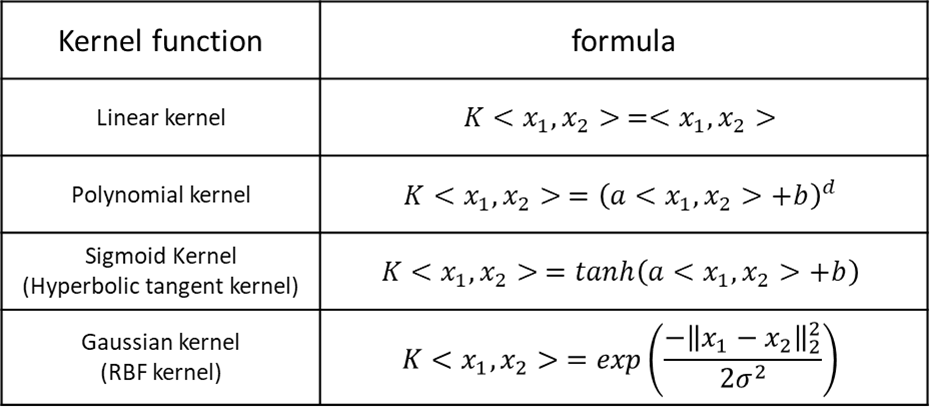


In [ ]:
svm = SVC(kernel = 'poly',degree=3,C=C,coef0=1)
svm.fit(X_scaled, y)

SVC(C=1, coef0=1, kernel='poly')

* 그리드 생성

In [ ]:
#주어진 데이터의 값 범위에 해당하는 격자를 생성하는 함수 정의
def make_meshgrid(x,y,h=.02):
    x_min, x_max=x.min()-1,x.max()+1 #X0에서 제일 작은 값, 큰 값
    y_min, y_max=y.min()-1,y.max()+1 #X1에서 제일 작은 값, 큰 값
    xx,yy=np.meshgrid(np.arange(x_min,x_max,h), np.arange(y_min,y_max,h))
    return xx,yy

In [ ]:
# create grids
X0, X1 = X[:,0], X[:,1]
xx0, xx1 = make_meshgrid(X0,X1)

In [ ]:
#standardization on the grids
xgrid = np.c_[xx0.ravel(),xx1.ravel()]
xgridstan = scaler.transform(xgrid)


* 결정 경계 표현

In [ ]:
#prediction
pred=svm.predict(xgridstan)
pred=pred.reshape(xx0.shape)

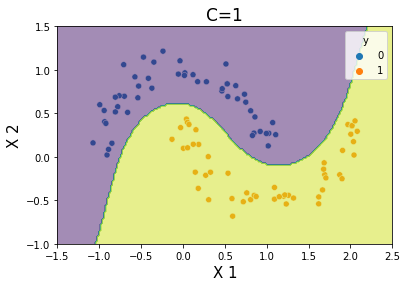

In [ ]:
#plotting prediction contours - decision boundary(Z=0), and two margins(Z=1 or -1)
sns.scatterplot(data=data, x='x1',y='x2',hue='y')
plt.contourf(xx0,xx1,pred,alpha=0.5)
plt.xlim(-1.5,2.5)
plt.ylim(-1,1.5)
plt.xlabel('X 1', fontsize=15)
plt.ylabel('X 2', fontsize=15)
plt.title(f'C={C}', fontsize=17)
plt.show()
